# 02506 Quizzes 2022

In [2]:
#! pip install --upgrade numpy
import numpy as np
import matplotlib.pyplot as plt

from skimage.io import imread, imshow

import maxflow.fastmin

from skimage.draw import polygon2mask
from skimage.feature import peak_local_max
import cv2
from shapely.geometry import Polygon
import scipy
from skimage import color

import slgbuilder

import torch


## Week 1

### 1. Which number appears when you convolve the image noisy_number.png with an appropriately large Gaussian kernel? 

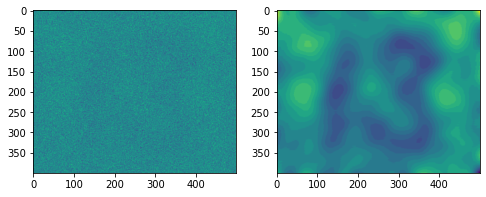

In [5]:
img = imread('./data/noisy_number.png')

sigma = 15;
convolved = scipy.ndimage.gaussian_filter(img, sigma, mode='nearest')


fig, ax = plt.subplots(1,2,figsize=(8,4))
ax[0].imshow(img)
ax[1].imshow(convolved)

So the result is 13.

### 2. What is the boundary length computed from the image fuel_cell_1.tif?

In [7]:
def boundary_length(img):
    hor = img[1:,:]!=img[:-1,:]
    ver = img[:,1:]!=img[:,:-1]
    return hor.sum() + ver.sum()

img = imread('./data/fuel_cell_1.tif')

print(f"The boundary length is {boundary_length(img)}")

The boundary length is 16328


### 3. What is the length of the curve computed by smoothing dino_noisy.txt curve using Equation 1.10 and the parameter lambda=0.25?

/tmp/ipykernel_628/2952165167.py:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  D = np.fromfunction(lambda i,j: np.minimum((i-j)%N,(j-i)%N), (N,N), dtype=np.int)


(-9.2778371, 9.8468971, -6.7972268, 7.9649228)

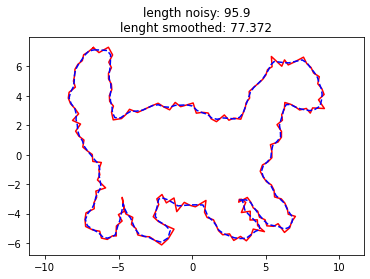

In [14]:
img = np.loadtxt('./data/dino_noisy.txt')

# Lambda
lamb = 0.25

N = img.shape[0]

def curve_length(X):
    d = (np.sqrt(((X-np.roll(X, shift=1, axis=0))**2).sum(axis=1))).sum()
    return(d)

a = np.array([-2, 1, 0]) 
D = np.fromfunction(lambda i,j: np.minimum((i-j)%N,(j-i)%N), (N,N), dtype=np.int)
L = a[np.minimum(D,len(a)-1)]

img_solution = np.matmul(lamb*L+np.eye(N),img)

closed_ind = np.r_[np.arange(N),0] # for easy plotting a closed snake
fig, ax = plt.subplots()
ax.plot(img[closed_ind,0], img[closed_ind,1],'r')
ax.plot(img_solution[closed_ind,0], img_solution[closed_ind,1],'b--')
ax.set_title(f'length noisy: {curve_length(img):.5g}\n'+
             f'lenght smoothed: {curve_length(img_solution):.5g}')
ax.axis('equal')


### Reference Solution

/tmp/ipykernel_628/3720064738.py:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  I_noisy = skimage.io.imread('./data/noisy_number.png').astype(np.float)


The boundary length is 16328


/tmp/ipykernel_628/3720064738.py:44: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  D = np.fromfunction(lambda i,j: np.minimum((i-j)%N,(j-i)%N), (N,N), dtype=np.int)


(-9.2778371, 9.8468971, -6.7972268, 7.9649228)

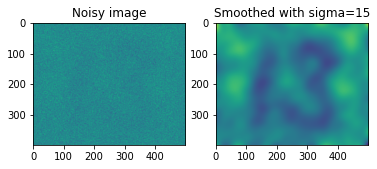

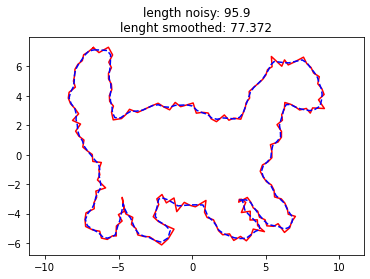

In [19]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Feb  9 23:07:36 2021

@author: vand
"""

import numpy as np
import scipy
import skimage.io
import matplotlib.pyplot as plt

#%% QUESTION 1
I_noisy = skimage.io.imread('./data/noisy_number.png').astype(np.float)
sigma = 15;
I_smoothed = scipy.ndimage.gaussian_filter(I_noisy, sigma, mode='nearest')

fig, ax = plt.subplots(1,2)
ax[0].imshow(I_noisy)
ax[0].set_title('Noisy image')
ax[1].imshow(I_smoothed)
ax[1].set_title(f'Smoothed with sigma={sigma}')

#%% QUESTION 2
def boundary_length(S):
    L = np.sum(S[1:,:]!=S[:-1,:])+np.sum(S[:,1:]!=S[:,:-1])
    return L


I = skimage.io.imread('./data/fuel_cell_1.tif')
L = boundary_length(I)
print(f"The boundary length is {L}")

#%% QUESTION 3
X_noisy = np.loadtxt('./data/dino_noisy.txt')
N = X_noisy.shape[0]

def curve_length(X):
    d = (np.sqrt(((X-np.roll(X, shift=1, axis=0))**2).sum(axis=1))).sum()
    return(d)

a = np.array([-2, 1, 0]) 
D = np.fromfunction(lambda i,j: np.minimum((i-j)%N,(j-i)%N), (N,N), dtype=np.int)
L = a[np.minimum(D,len(a)-1)]

X_solution = np.matmul(0.25*L+np.eye(N),X_noisy)

closed_ind = np.r_[np.arange(N),0] # for easy plotting a closed snake
fig, ax = plt.subplots()
ax.plot(X_noisy[closed_ind,0], X_noisy[closed_ind,1],'r')
ax.plot(X_solution[closed_ind,0], X_solution[closed_ind,1],'b--')
ax.set_title(f'length noisy: {curve_length(X_noisy):.5g}\n'+
             f'lenght smoothed: {curve_length(X_solution):.5g}')
ax.axis('equal')

## Week 2 - Scale Space

### 1. What is the mean radius (in pixels) of the blobs from the image test_blob_varying.png?

Mean radius 28.03 pixels


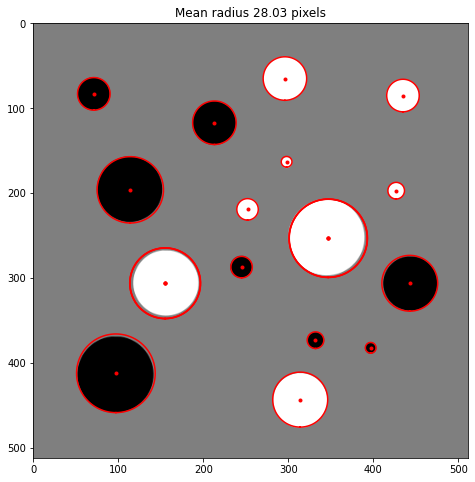

In [3]:
def getGaussDerivative(t):
    kSize = 5
    s = np.sqrt(t)
    x = np.arange(int(-np.ceil(s*kSize)), int(np.ceil(s*kSize))+1)
    x = np.reshape(x,(-1,1))
    g = np.exp(-x**2/(2*t))
    g = g/np.sum(g)
    dg = -x/t*g
    ddg = -g/t - x/t*dg
    dddg = -2*dg/t - x/t*ddg
    return g, dg, ddg, dddg


img = imread('./data/test_blob_varying.png').astype(np.float32)

t = 4
g, dg, ddg, dddg = getGaussDerivative(t)

r,c = img.shape
n = 300
L_blob_vol = np.zeros((r,c,n)).astype(np.float32)
tStep = np.zeros(n)

Lg = img
for i in range(0,n):
    tStep[i] = t*i
    L_blob_vol[:,:,i] = tStep[i]*(cv2.filter2D(cv2.filter2D(Lg, -1, g), -1, ddg.T) + 
        cv2.filter2D(cv2.filter2D(Lg, -1, ddg), -1, g.T))
    Lg = cv2.filter2D(cv2.filter2D(Lg, -1, g), -1, g.T)


#%% find maxima in scale-space
thres = 40.0
coord_pos = peak_local_max(L_blob_vol, threshold_abs = thres)
coord_neg = peak_local_max(-L_blob_vol, threshold_abs = thres)
coord = np.r_[coord_pos,coord_neg]

#%%
scale = tStep[coord[:,2]]
mean_radius = np.mean(np.sqrt(2*scale))
print(f'Mean radius {mean_radius:0.2f} pixels')

theta = np.arange(0, 2*np.pi, step=np.pi/100)
theta = np.append(theta, 0)
circ = np.array((np.cos(theta),np.sin(theta)))
n = coord.shape[0]
m = circ.shape[1]
circ_y = np.sqrt(2*scale)*np.reshape(circ[0,:],(1,-1)).T*np.ones((1,n)) + np.ones((m,1))*np.reshape(coord[:,0],(-1,1)).T
circ_x = np.sqrt(2*scale)*np.reshape(circ[1,:],(1,-1)).T*np.ones((1,n)) + np.ones((m,1))*np.reshape(coord[:,1],(-1,1)).T


fig, ax = plt.subplots(1,1,figsize=(8,8),sharex=True,sharey=True)
ax.imshow(img, cmap='gray')
ax.plot(coord[:,1], coord[:,0], '.r')
ax.set_title(f'Mean radius {mean_radius:0.2f} pixels')
plt.plot(circ_x, circ_y, 'r')

### 2. What is the number of fibers detected by the blob detector in the image CT_lab_high_res.png?

There are {np.size(coord[:,0])} fibres


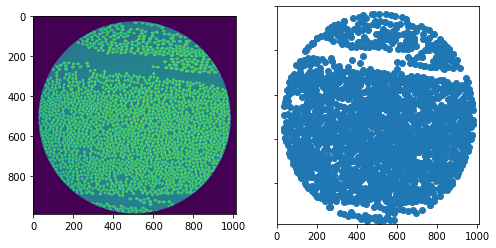

In [11]:
def getGaussDerivative(t):
    kSize = 5
    s = np.sqrt(t)
    x = np.arange(int(-np.ceil(s*kSize)), int(np.ceil(s*kSize))+1)
    x = np.reshape(x,(-1,1))
    g = np.exp(-x**2/(2*t))
    g = g/np.sum(g)
    dg = -x/t*g
    ddg = -g/t - x/t*dg
    dddg = -2*dg/t - x/t*ddg
    return g, dg, ddg, dddg

img = imread('./data/CT_lab_high_res.png').astype(np.float32)

# diameter interval and steps
d = np.arange(10, 24.5, step = 0.4)
tStep = np.sqrt(0.5)*((d/2)**2) # convert to scale

#%% Compute scale space

r,c = img.shape
n = d.shape[0]
L_blob_vol = np.zeros((r,c,n))

for i in range(0,n):
    g, dg, ddg, dddg = getGaussDerivative(tStep[i])
    L_blob_vol[:,:,i] = tStep[i]*(cv2.filter2D(cv2.filter2D(img,-1,g),-1,ddg.T) + 
                                  cv2.filter2D(cv2.filter2D(img,-1,ddg),-1,g.T))


#%% Find maxima in scale space

thres = 30
coord = peak_local_max(-L_blob_vol, threshold_abs = thres)

print("There are {np.size(coord[:,0])} fibres")

fig, ax = plt.subplots(1,2,figsize=(8,4),sharex=True,sharey=True)
ax[0].imshow(img)
ax[1].scatter(np.flip(coord[:,1]),np.flip(coord[:,0]))


### 3. What is the mean radius (in pixels) of the blobs from the image CT_lab_high_res.png?

In [ ]:
img = imread('./data/CT_lab_high_res.png')

## Week 3 - Feature Based Registration
### 1. Feature Size
You have an image of the size $256 \times 408$ pixels and you want to compute dense
features consisting of pixel intensities collected from $9 \times 9$ patches centered
around each pixel, where such patch is valid. You want to store the extracted
features in a 3D array. What is the total number of elements (a product height times
width times depth) of the array you would choose to store the features?

In [ ]:
s1 = 9
s2 = 9
h = 256
w = 408
res = (h-(s1-1))*(w-(s2-1))*s1*s2
print(f"The result is {res}")

The result is 8035200


### 2. Cluster Probability
You are approaching a 3-label segmentation as explained in the exercise 3.2. You
choose to cluster the features extracted from the training image in 1000 clusters.
It turns out, that cluster number 5 contains 120 image features. In the training
image, the features from cluster 5 are represented with 90, 20, and 10 features in
labels 1, 2, and, 3, respectively. What is $p_5(1) + p_5(2)$?

In [ ]:
n = 120
p1 = 90/n
p2 = 20/n
p3 = 10/n
print(f"p1+p2={p1+p2}")

p1+p2=0.9166666666666666


### 3. Dominant Semgentation
You are segmenting an image into labels 1, 2, and 3. You represent the probability
image using an $r \times 3$ array. The first three rows, five columns and two
layers of the probability image are shown below. Which label is dominant in the
segmentation of this $3 \times 5$ window?

In [3]:
l1 = np.array([0.11, 0.16, 0.21, 0.26, 0.31, 0.09, 0.14, 0.19, 0.24, 0.29, 0.07, 0.12, 0.17, 0.22, 0.27])
l2 = np.array([0.67, 0.55, 0.43, 0.31, 0.19, 0.59, 0.47, 0.35, 0.23, 0.11, 0.51, 0.39, 0.27, 0.15, 0.03])
l3 = 1.0-(l1+l2)
img = np.array([l1,l2,l3])
labels = np.argmax(img,0)+1 # plus one due to one index of labels
print(labels)
for i in np.unique(labels):
    print(f"p(x={i})={sum(labels == i)/np.size(labels)}")

[2 2 2 3 3 2 2 3 3 3 2 3 3 3 3]
p(x=2)=0.4
p(x=3)=0.6


## Week 4 - Feature-based Registration

### 1. What is the length of the translation vector (in pixels) between original (not rotated) points? That is, what is the distance between $\mu_q$ and $\mu_p$?

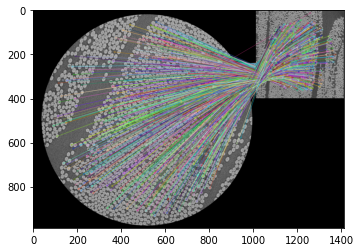

(<matplotlib.image.AxesImage at 0x7fcd1c418a00>, None)

In [41]:
img2 = imread('./data/quiz_image_2.png')
img1 = imread('./data/quiz_image_1.png')

# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance/(n.distance+1e-10) < 0.60:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

In [42]:
def get_transformation(p,q):
    m_p = np.mean(p,axis=1,keepdims=True)
    m_q = np.mean(q,axis=1,keepdims=True)
    s = np.linalg.norm(q-m_q)/np.linalg.norm(p-m_p)
    
    C = (q-m_q)@(p-m_p).T
    U,S,V = np.linalg.svd(C)
    
    R_ = U@V
    R = R_@np.array([[1,0],[0,np.linalg.det(R_)]])
    
    t = m_q - s*R@m_p
    return R,t,s


def get_robust_transformation(p,q,thres = 3):
    
    R,t,s = get_transformation(p,q)

    q_1 = s*R@p + t
    d = np.linalg.norm(q - q_1, axis=0)
    idx = np.where(d<thres)[0]
    
    R,t,s = get_transformation(p[:,idx],q[:,idx])
    
    return R,t,s,idx


Px = []
Py = []
Qx = []
Qy = []
for m,n in matches:
    if m.distance/(n.distance+1e-10) < 0.6:
        Px.append(kp1[m.queryIdx].pt[0])
        Py.append(kp1[m.queryIdx].pt[1])
        Qx.append(kp2[m.trainIdx].pt[0])
        Qy.append(kp2[m.trainIdx].pt[1])

P = np.vstack((np.array(Px),np.array(Py)))
Q = np.vstack((np.array(Qx),np.array(Qy)))

R,t,s,idx = get_robust_transformation(P,Q)
print(f"The nrom of the translation vector is {np.linalg.norm(t)}")

The nrom of the translation vector is 539.8185272358818


### 2. What is the magnification scale (i.e. the larger of the numbers s and 1/s)?

In [43]:
print(f"s={s} and 1/s={1/s}")

s=0.3683666988217564 and 1/s=2.714686216746958


### 3. What is the absolute angle of the rotation in degrees?

In [44]:
print(f"R={R}")
print(f"theta = {np.arctan2(R[1,0],R[1,1])}")

R=[[-0.92056795 -0.39058246]
 [ 0.39058246 -0.92056795]]
theta = 2.740328428519812


## Week 5 - Markov Random Fields

### 1. What is the prior energy of the maximum likelihood solution?

Likelihood: 18
prior: 120
posterior: 138


(18, 120)

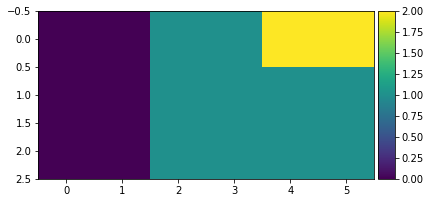

In [53]:
def segmentation_energy(S, I, mu, beta):
    if (np.size(mu) == 3):
        # likelihood energy
        likelihood = int(((mu[S0]-I)**2).sum())
        # prior energy
        prior = beta * ((S0[1:,:]!=S0[:-1,:]).sum() + (S0[:,1:]!=S0[:,:-1]).sum())
    else :  
        # likelihood energy
        likelihood = ((mu[S]-I)**2).sum()
        # prior energy
        V2x = S[1:,:]!=S[:-1,:]
        V2y = S[:,1:]!=S[:,:-1]
        prior = beta * (V2x.sum() + V2y.sum())
    print(f'Likelihood: {int(likelihood)}\nprior: {prior}\nposterior: {int(likelihood+prior)}')
    return(likelihood,prior)

img = np.array([[1, 2, 6, 4, 10, 8],[4, 1, 3, 5, 9, 6],[5, 2, 3, 5, 4, 7]])

# Centers
mu = np.array([2, 5, 10])

# Smoothness
beta = 10

U = np.stack([img-mu[0], img-mu[1], img-mu[2]], axis=2)**2

#%% C computing MAP using graph cuts
S0 = np.argmin(U, axis=2)
S_GC = S0.copy()
seg = maxflow.fastmin.aexpansion_grid(U, beta - 
                            beta*np.eye(3, 3, dtype=U.dtype), labels = S_GC)
seg = seg
imshow(seg)
segmentation_energy(seg, img, mu, beta)

### 2. 2. What is the likelihood energy of the configuration where the leftmost two columns are labeled as belonging to the segment 1, middle two columns are labeled as belonging to the segment 2, and rightmost two colums are labeled as belonging to the segment 3?

In [ ]:
img = np.array([[1, 2, 6, 4, 10, 8],[4, 1, 3, 5, 9, 6],[5, 2, 3, 5, 4, 7]])

# Centers
mu = np.array([2, 5, 10])

# Smoothness
beta = 10

U = np.stack([img-mu[0], img-mu[1], img-mu[2]], axis=2)**2

#%% C computing MAP using graph cuts
S0 = np.argmin(U, axis=2)
S_GC = S0.copy()
seg = maxflow.fastmin.aexpansion_grid(U, beta - 
                            beta*np.eye(3, 3, dtype=U.dtype), labels = S_GC)
seg = seg
imshow(seg)
segmentation_energy(seg, img, mu, beta)